# Assignment 4: Creating Reports and Dashboards for Predictive and Prescriptive Analysis

## **Part 2: Prescriptive Analysis with Bike Sharing Dataset**

##### Course Title: **CPSC-510-5: Winter 2025 Data Warehousing/Visualization**
##### Professor Name: **Professor Mehdi (Matt) Mostofi**
##### Submission Date: **March 23, 2025**
##### Submitted By:
1. **Dev D. Rabadia (NF1005560)**
2. **Dayanara Torres Macalino (NF1001047)**
3. **Stephy Marvin Christi (NF1003839)**
4. **Miko L. Tan (NF1008647)**

**Objective:** The objective of this assignment is to enhance your skills in creating reports and dashboards using Power BI by working with both predictive and prescriptive datasets. You will visualize data, expose insights, and perform both predictive and prescriptive analysis to derive actionable insights.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import numpy as np
from scipy.special import logit

## Load the Iris Dataset

In [78]:
# Load the dataset
bike_share_data = pd.read_csv('Bike Sharing Dataset.csv')

**Dataset Features:**  
1. instant: A unique identifier for each row (record).  
2. dteday: The date of the record.  
3. season: The season of the year (1: Spring, 2: Summer, 3: Fall, 4: Winter).  
4. yr: The year (0: 2011, 1: 2012).  
5. mnth: The month of the year (1 to 12).  
6. holiday: Whether the day is a holiday or not (0: No, 1: Yes).  
7. weekday: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).  
8. workingday: Whether the day is a working day or not (0: Weekend/Holiday, 1: Working Day).  
9. weathersit: The weather situation (1: Clear, 2: Mist/Cloudy, 3: Light Rain/Snow, 4: Heavy Rain/Snow).  
10. temp: Normalized temperature in Celsius (values divided by 41).  
11. atemp: Normalized "feels like" temperature in Celsius (values divided by 50).  
12. hum: Normalized humidity (values divided by 100).  
13. windspeed: Normalized wind speed (values divided by 67).  
14. casual: Number of casual users (non-registered).  
15. registered: Number of registered users.  
16. cnt: Total number of bike rentals (casual + registered).  

## Exploratory Data Analysis (EDA)

In [79]:
# Basic structure and data types
bike_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [80]:
# Summary statistics
print(bike_share_data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [81]:
# Check for nulls
missing_data = bike_share_data.isnull().sum()

# Calculate percentage of missing data
missing_percentage = (missing_data / len(bike_share_data)) * 100

# Create a dataframe to store the missing data information
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage,
})

# Define categories for missing percentage
def categorize_missing_data(percentage):
    if percentage <= 5:
        return 'Small (1-5%)'
    elif 5 < percentage <= 20:
        return 'Moderate (5-20%)'
    elif 20 < percentage <= 40:
        return 'High (20-40%)'
    else:
        return 'Very High (40%+)'

# Apply the categorization function
missing_info['Classification'] = missing_info['Missing Percentage'].apply(categorize_missing_data)

# Sort by missing percentage in descending order for better visibility
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_info)

            Missing Count  Missing Percentage Classification
instant                 0                 0.0   Small (1-5%)
dteday                  0                 0.0   Small (1-5%)
season                  0                 0.0   Small (1-5%)
yr                      0                 0.0   Small (1-5%)
mnth                    0                 0.0   Small (1-5%)
holiday                 0                 0.0   Small (1-5%)
weekday                 0                 0.0   Small (1-5%)
workingday              0                 0.0   Small (1-5%)
weathersit              0                 0.0   Small (1-5%)
temp                    0                 0.0   Small (1-5%)
atemp                   0                 0.0   Small (1-5%)
hum                     0                 0.0   Small (1-5%)
windspeed               0                 0.0   Small (1-5%)
casual                  0                 0.0   Small (1-5%)
registered              0                 0.0   Small (1-5%)
cnt                     

In [82]:
# Check for duplicate rows
duplicates = bike_share_data.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Duplicate rows:")
    print(bike_share_data[iris_data.duplicated()])

Number of duplicate rows: 0


In [83]:
# Check for non-unique values
bike_share_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [84]:
bike_share_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


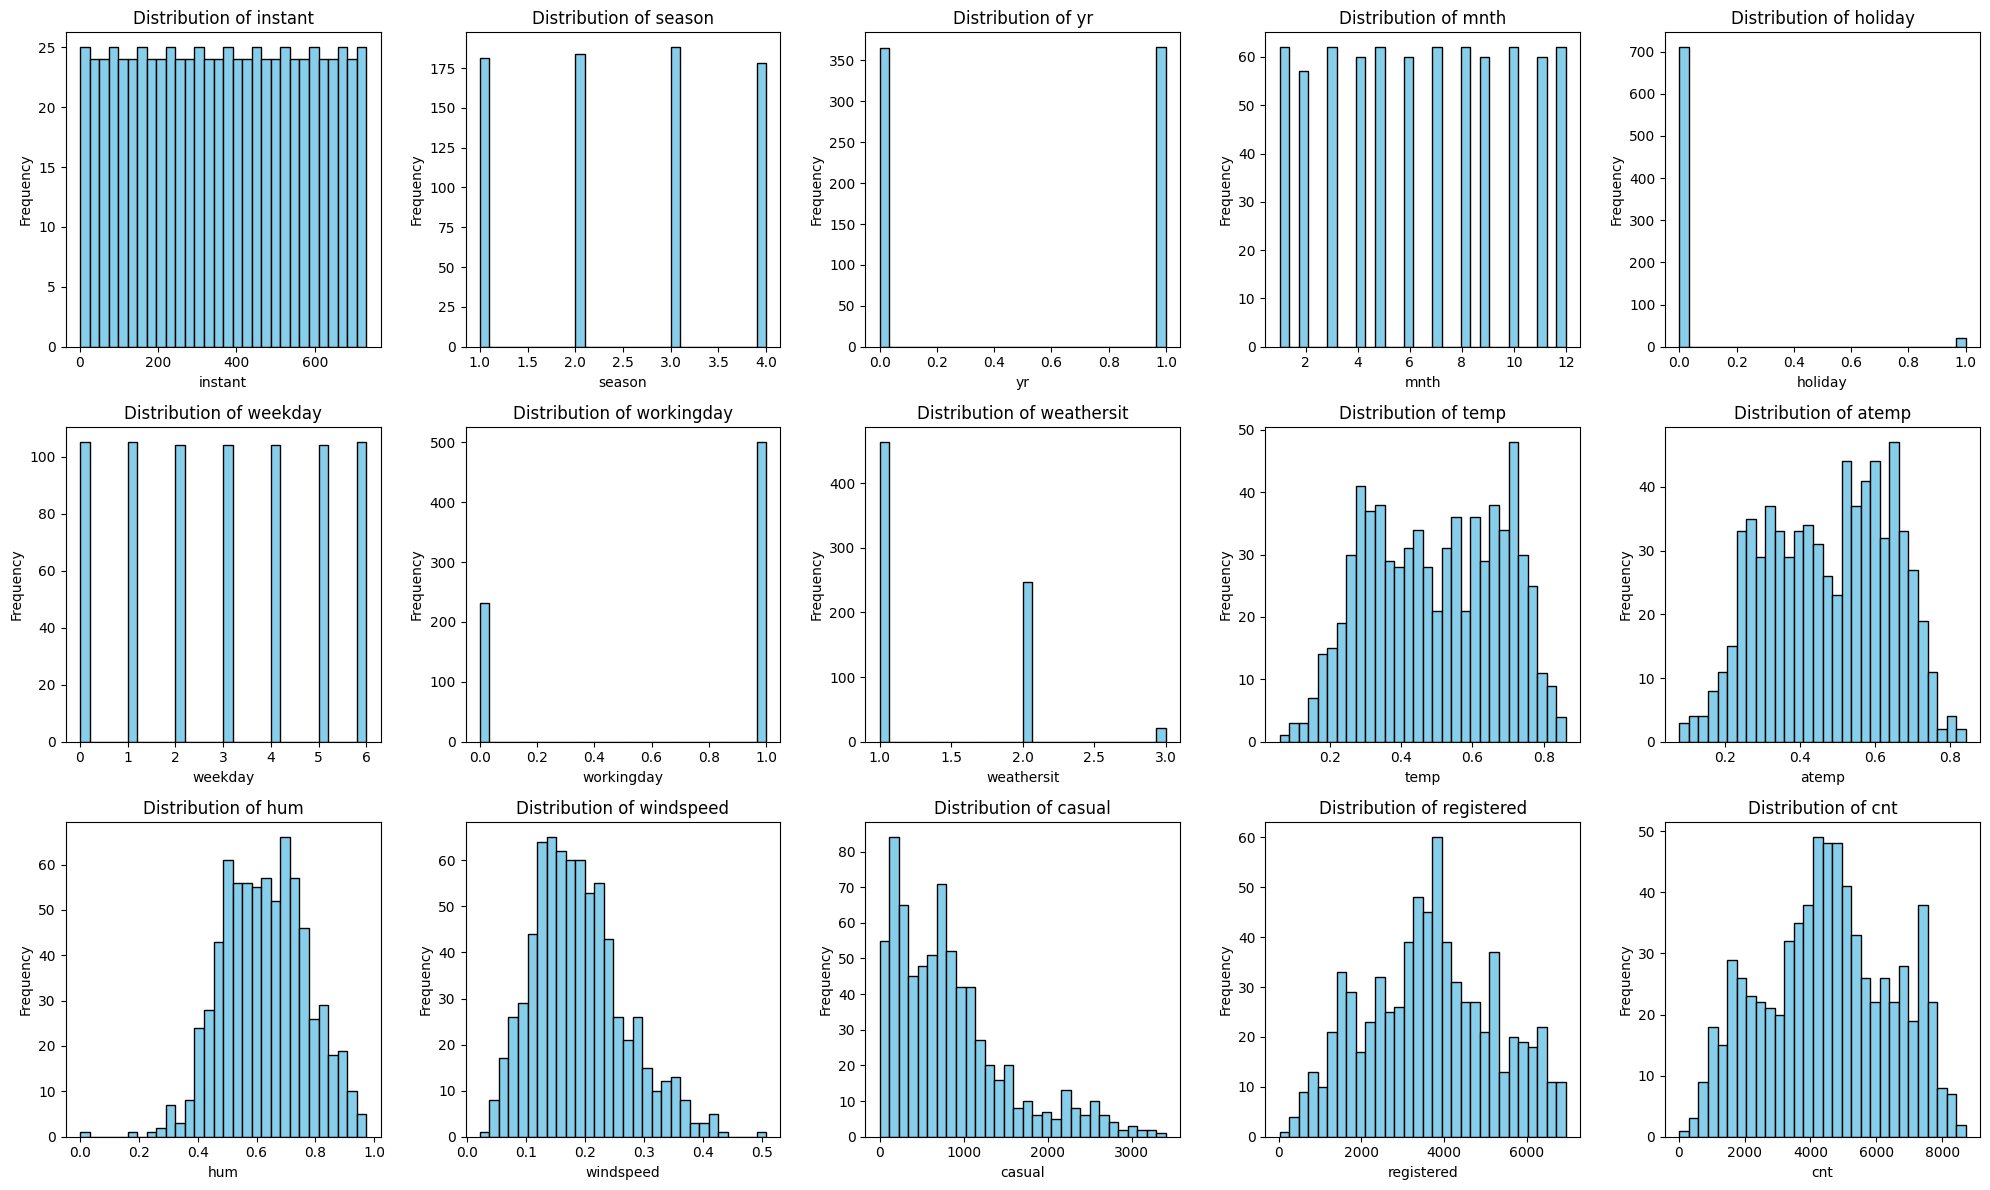

In [85]:
# Check distribution of numerical features
# Get numerical columns
num_columns = bike_share_data.select_dtypes(include=['number']).columns

# Define grid size (5 columns)
num_cols = 5
num_rows = (len(num_columns) // num_cols) + (len(num_columns) % num_cols > 0)

# Create a figure with a grid of subplots
plt.figure(figsize=(20, 4 * num_rows))  # Adjust height based on the number of rows

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Position plot in a grid
    plt.hist(bike_share_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

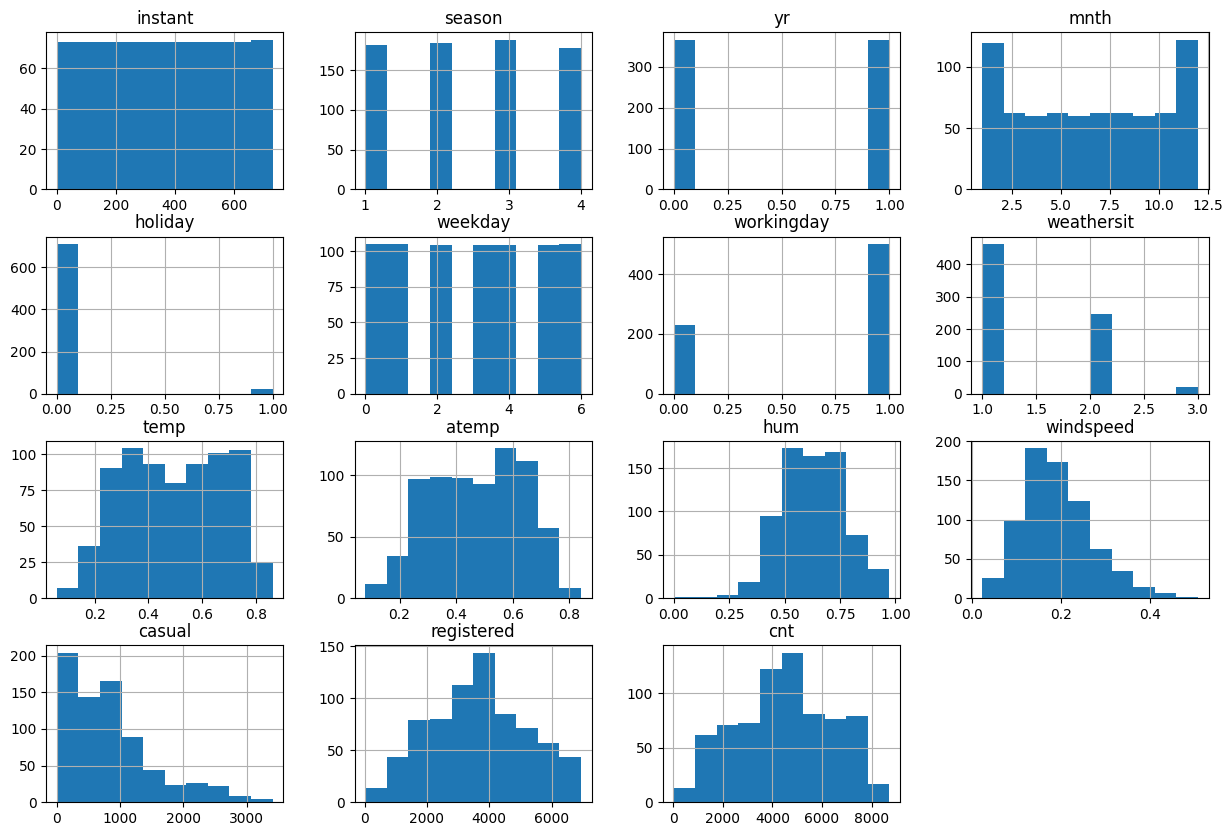

In [86]:
# Univariate Analysis
# Histograms for numerical columns
bike_share_data.hist(figsize=(15, 10))
plt.show()

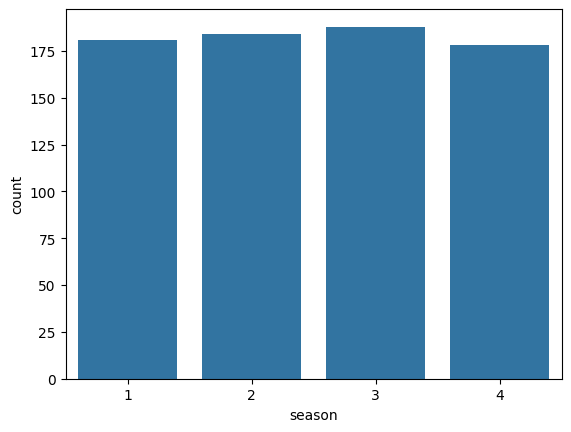

In [87]:
# Bar plots for categorical columns
sns.countplot(x='season', data=bike_share_data)
plt.show()

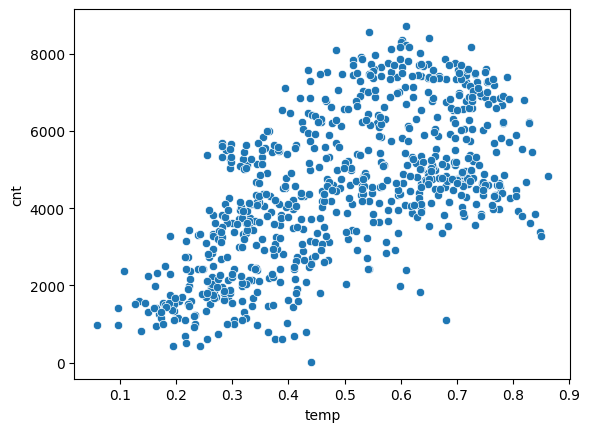

In [88]:
# Bivariate Analysis
# Scatter plot between temp and cnt
sns.scatterplot(x='temp', y='cnt', data=bike_share_data)
plt.show()

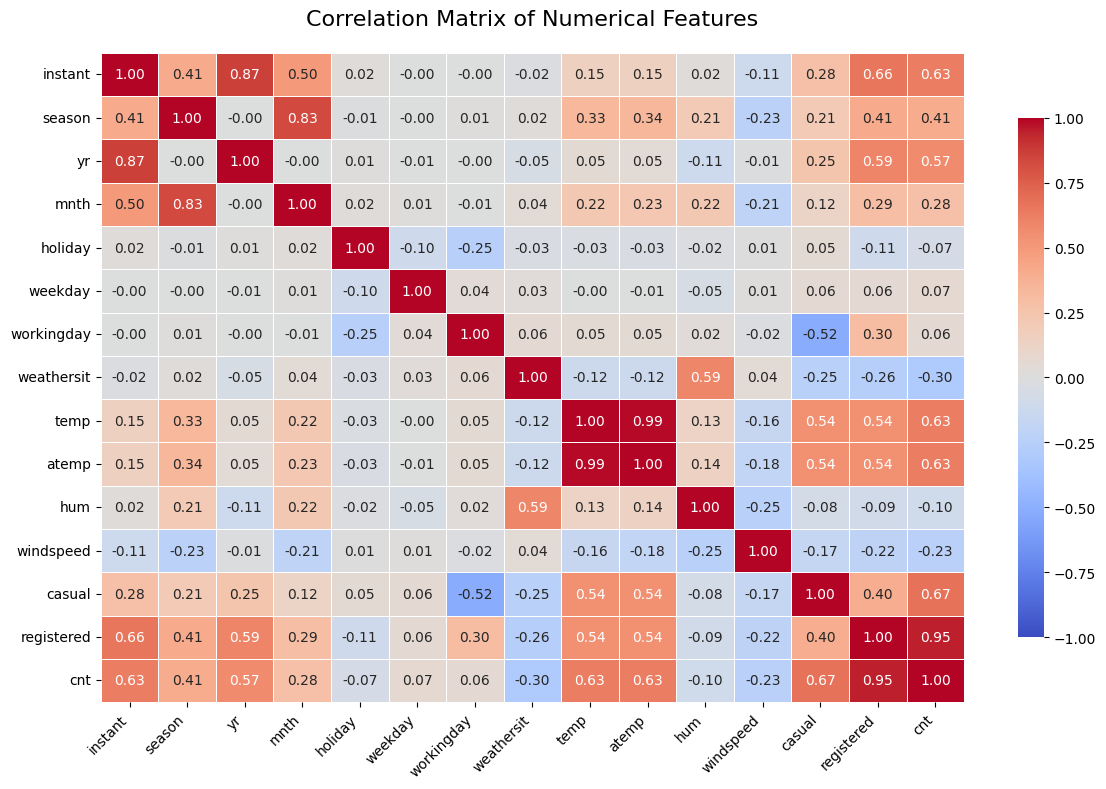

In [89]:
# Correlation matrix
# Select only numerical columns for correlation
numerical_data = bike_share_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations and a custom color map
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',  # Format annotations to 2 decimal places
    linewidths=0.5,  # Add lines between cells for better readability
    vmin=-1,  # Set the minimum value for the color map
    vmax=1,  # Set the maximum value for the color map
    center=0,  # Center the color map at 0
    annot_kws={'size': 10},  # Adjust annotation font size
    cbar_kws={'shrink': 0.8}  # Adjust color bar size
)

# Add a title
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [90]:
# Skewness Computation with Interpretation
# Select only numerical columns
numerical_columns = bike_share_data.select_dtypes(include=['number'])

# Compute skewness
skew_values = numerical_columns.skew().sort_values(ascending=False)

# Create a DataFrame to store skewness values
skew_df = pd.DataFrame({'Skewness Value': skew_values})

# Apply interpretation directly
skew_df['Interpretation'] = ""

skew_df.loc[skew_df['Skewness Value'] == 0, 'Interpretation'] = "Norm Dist (γ₁ = 0)"
skew_df.loc[(skew_df['Skewness Value'] > -0.5) & (skew_df['Skewness Value'] < 0.5), 'Interpretation'] = "Min/No Skew (γ₁ = -0.5 to 0.5)"
skew_df.loc[skew_df['Skewness Value'] > 1, 'Interpretation'] = "Extreme Right-Skewed (γ₁ > 1)"
skew_df.loc[skew_df['Skewness Value'] < -1, 'Interpretation'] = "Extreme Left-Skewed (γ₁ < -1)"
skew_df.loc[(skew_df['Skewness Value'] >= 0.5) & (skew_df['Skewness Value'] <= 1), 'Interpretation'] = "Right-Skewed (γ₁ > 0.5)"
skew_df.loc[(skew_df['Skewness Value'] <= -0.5) & (skew_df['Skewness Value'] >= -1), 'Interpretation'] = "Left-Skewed (γ₁ < -0.5)"

# Display the skewness table
print(skew_df)

            Skewness Value                  Interpretation
holiday           5.654224   Extreme Right-Skewed (γ₁ > 1)
casual            1.266454   Extreme Right-Skewed (γ₁ > 1)
weathersit        0.957385         Right-Skewed (γ₁ > 0.5)
windspeed         0.677345         Right-Skewed (γ₁ > 0.5)
registered        0.043659  Min/No Skew (γ₁ = -0.5 to 0.5)
weekday           0.002742  Min/No Skew (γ₁ = -0.5 to 0.5)
instant           0.000000  Min/No Skew (γ₁ = -0.5 to 0.5)
season           -0.000384  Min/No Skew (γ₁ = -0.5 to 0.5)
yr               -0.002742  Min/No Skew (γ₁ = -0.5 to 0.5)
mnth             -0.008149  Min/No Skew (γ₁ = -0.5 to 0.5)
cnt              -0.047353  Min/No Skew (γ₁ = -0.5 to 0.5)
temp             -0.054521  Min/No Skew (γ₁ = -0.5 to 0.5)
hum              -0.069783  Min/No Skew (γ₁ = -0.5 to 0.5)
atemp            -0.131088  Min/No Skew (γ₁ = -0.5 to 0.5)
workingday       -0.793147         Left-Skewed (γ₁ < -0.5)


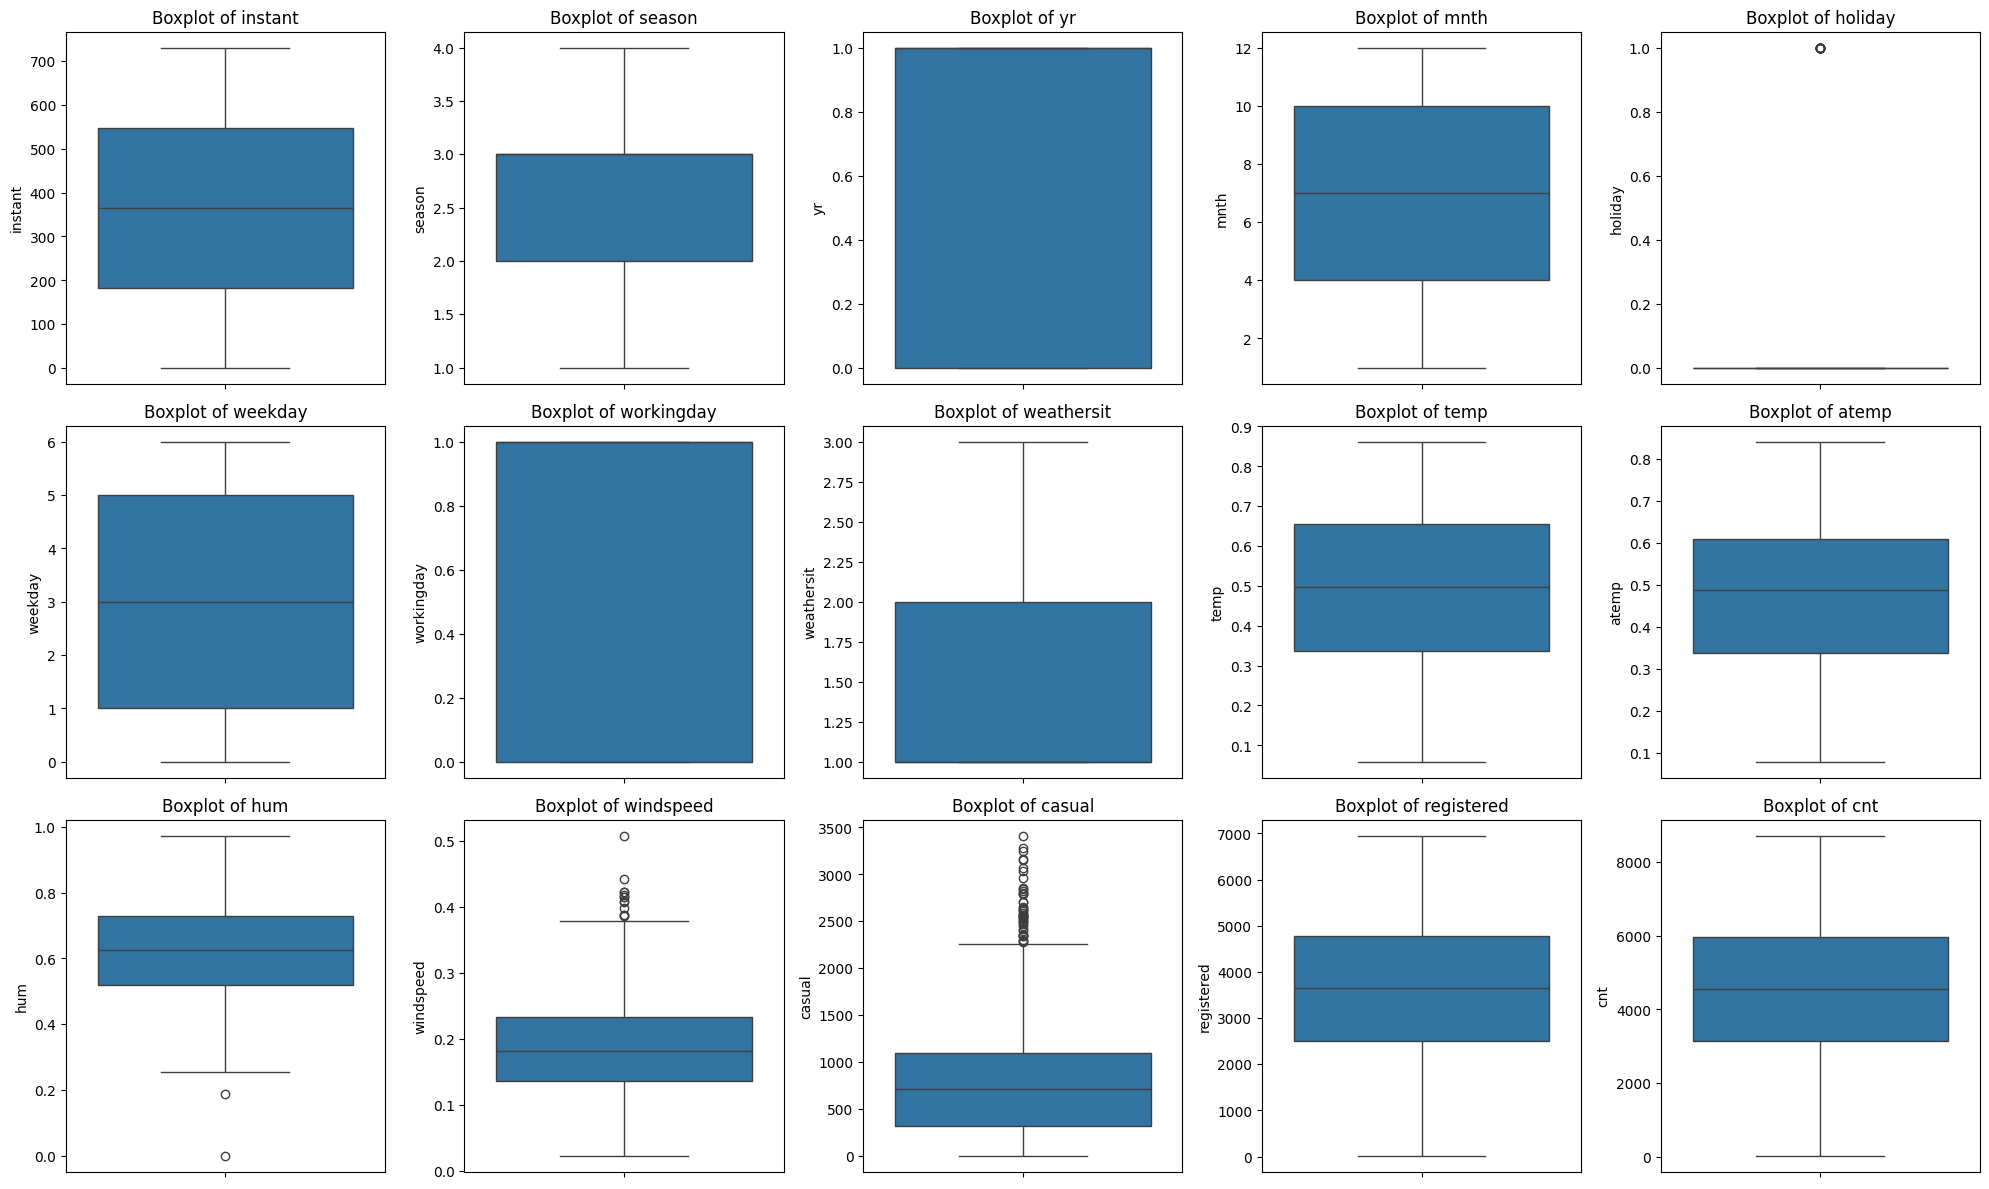

In [91]:
# Boxplots for outlier detection

# Get numerical columns
num_columns = bike_share_data.select_dtypes(include=['number']).columns

# Define grid size (5 columns)
num_cols = 5
num_rows = (len(num_columns) // num_cols) + (len(num_columns) % num_cols > 0)

# Create a figure with a grid of subplots
plt.figure(figsize=(20, 4 * num_rows))  # Adjust height based on the number of rows

# Loop through numerical columns and create boxplots
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Position plot in a 4x5 grid
    sns.boxplot(y=bike_share_data[col])
    plt.title(f"Boxplot of {col}")
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [92]:
# Print unique values for categorical columns
for col in bike_share_data.select_dtypes(include=["object"]).columns:
    unique_vals = bike_share_data[col].dropna().unique()
    print(f"Column: {col}")
    print("Unique Values:", unique_vals)
    print("Number of Unique Values:", len(unique_vals))
    print("-" * 50)

Column: dteday
Unique Values: ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011-03-12' '2011-03-13' '2011-03-14' '2011-

## Data Preprocessing

### Handling Missing Values / Duplicate Rows

In [93]:
# Remove duplicate rows from the data DataFrame
bike_share_data = bike_share_data.drop_duplicates()  # Overwrite data with the duplicate-free version
duplicates = bike_share_data.duplicated().sum()
print(f"Number of duplicate rows remaining: {duplicates}")

Number of duplicate rows remaining: 0


### Feature Engineering & Transformation / Advanced Analysis for AI Insights

### Handling Outliers

**Notes:**  
- **holiday**: Ignore skewness as it’s binary.
- **casual**: Retain it as it provides valuable information, but consider whether it’s needed if cnt is your target.  

In [94]:
# Check skewness before transformation
print("Skewness before transformation:")
print("Windspeed:", bike_share_data['windspeed'].skew())

# Ensure all values are positive (add a small constant if necessary)
bike_share_data['windspeed'] = bike_share_data['windspeed'] + 1e-5  # Add a small constant to avoid zeros

# Apply Box-Cox transformation
bike_share_data['windspeed_boxcox'], windspeed_lambda = boxcox(bike_share_data['windspeed'])

# Check skewness after transformation
print("\nSkewness after transformation:")
print("Windspeed (Box-Cox):", bike_share_data['windspeed_boxcox'].skew())

Skewness before transformation:
Windspeed: 0.6773454211095378

Skewness after transformation:
Windspeed (Box-Cox): -0.0033405211322374514


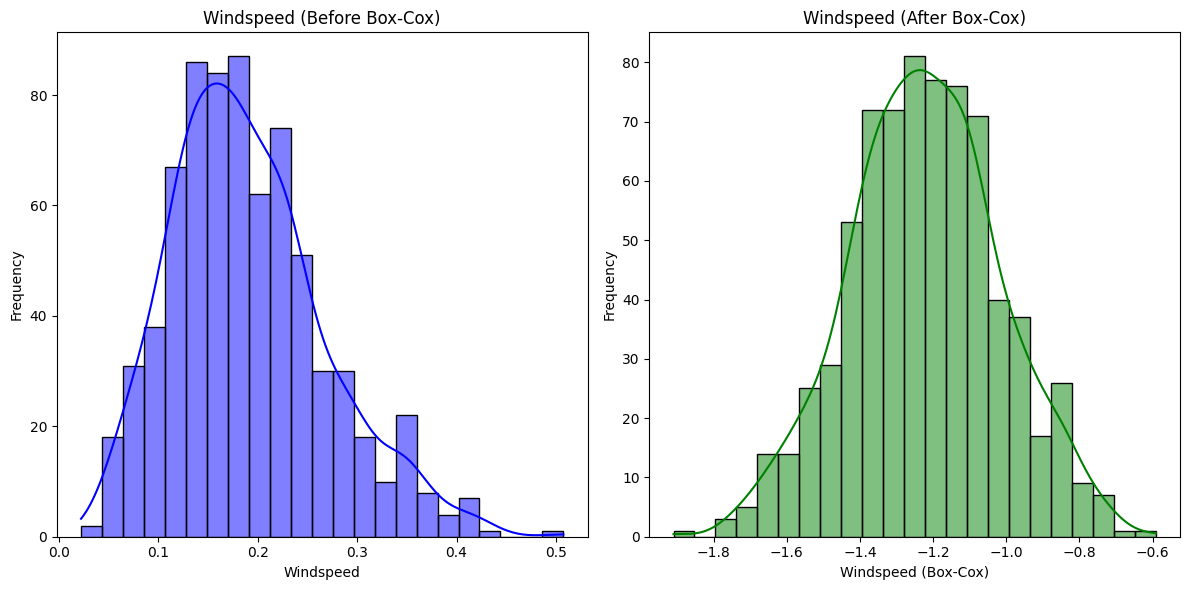

In [95]:
# Visualize the transformed columns - Windspeed
plt.figure(figsize=(12, 6))

# Before transformation
plt.subplot(1, 2, 1)
sns.histplot(bike_share_data['windspeed'], kde=True, color='blue')
plt.title('Windspeed (Before Box-Cox)')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(bike_share_data['windspeed_boxcox'], kde=True, color='green')
plt.title('Windspeed (After Box-Cox)')
plt.xlabel('Windspeed (Box-Cox)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [96]:
# Check skewness before transformation
print("Skewness before transformation:")
print("Weathersit:", bike_share_data['weathersit'].skew())

# Adjust values to avoid 0 and 1 (logit requires 0 < x < 1)
bike_share_data['weathersit_adjusted'] = bike_share_data['weathersit'].clip(1e-5, 1 - 1e-5)

# Apply logit transformation
bike_share_data['weathersit_logit'] = logit(bike_share_data['weathersit_adjusted'])

# Check skewness after transformation
print("\nSkewness after transformation:")
print("Weathersit (After Logit):", bike_share_data['weathersit_logit'].skew())

Skewness before transformation:
Weathersit: 0.9573852755868604

Skewness after transformation:
Weathersit (After Logit): 0.0


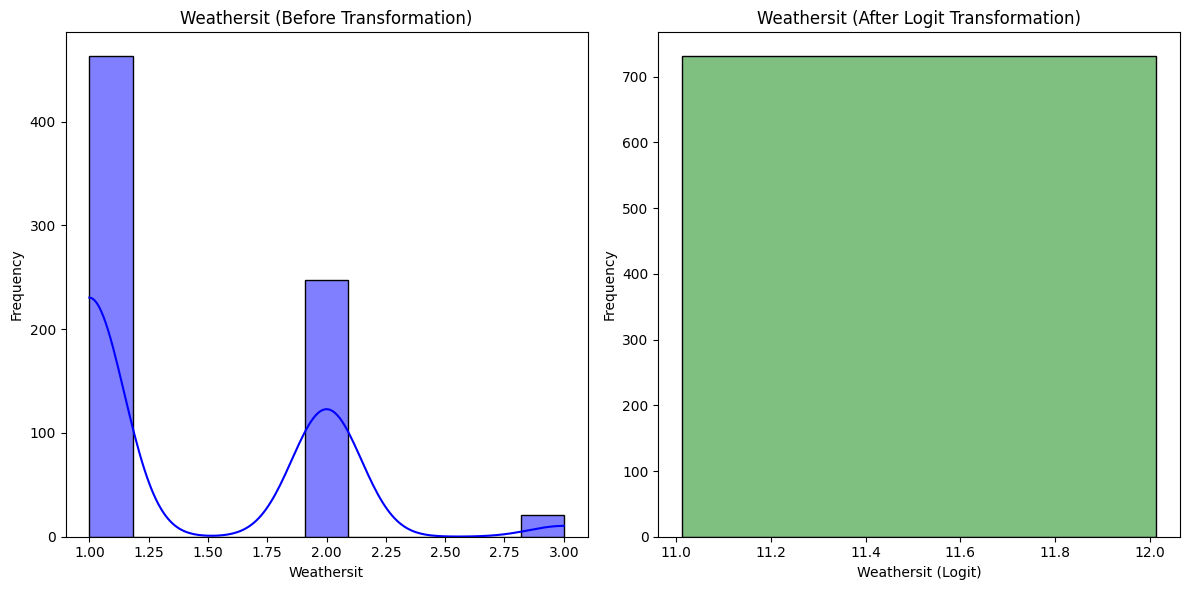

In [97]:
# Visualize before and after transformation - Weathersit
plt.figure(figsize=(12, 6))

# Before transformation
plt.subplot(1, 2, 1)
sns.histplot(bike_share_data['weathersit'], kde=True, color='blue')
plt.title('Weathersit (Before Transformation)')
plt.xlabel('Weathersit')
plt.ylabel('Frequency')

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(bike_share_data['weathersit_logit'], kde=True, color='green')
plt.title('Weathersit (After Logit Transformation)')
plt.xlabel('Weathersit (Logit)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

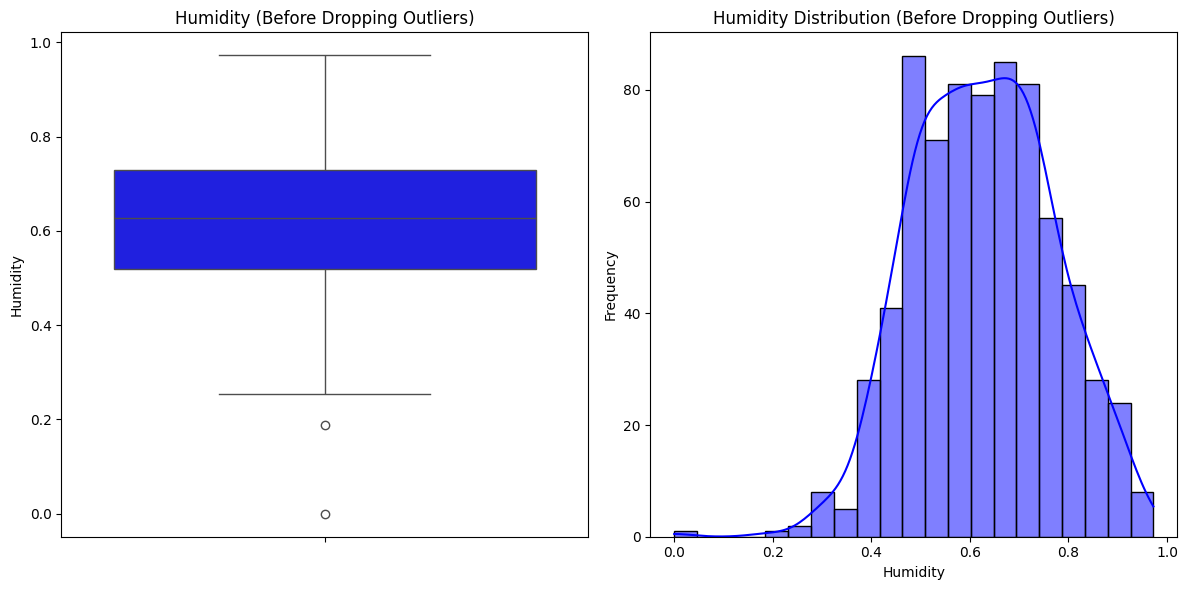

Number of outliers in 'hum': 2


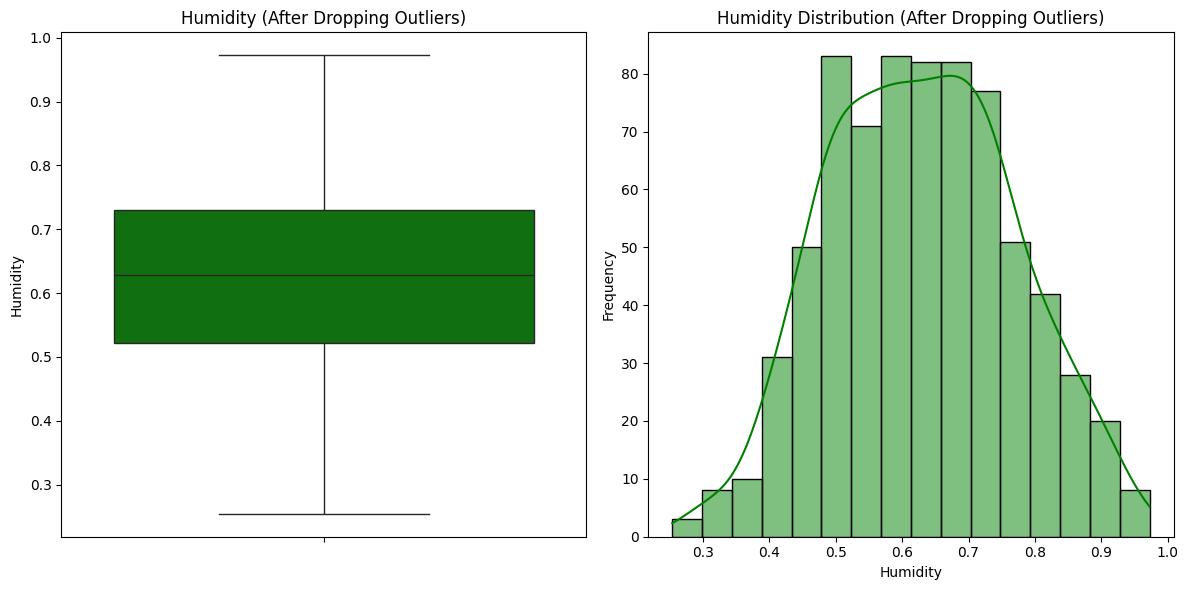

Shape before dropping outliers: (731, 19)
Shape after dropping outliers: (729, 19)


In [98]:
# Check the distribution of 'hum' before dropping outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=bike_share_data['hum'], color='blue')
plt.title('Humidity (Before Dropping Outliers)')
plt.ylabel('Humidity')

plt.subplot(1, 2, 2)
sns.histplot(bike_share_data['hum'], kde=True, color='blue')
plt.title('Humidity Distribution (Before Dropping Outliers)')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate IQR for 'hum'
Q1 = bike_share_data['hum'].quantile(0.25)
Q3 = bike_share_data['hum'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = bike_share_data[(bike_share_data['hum'] < lower_bound) | (bike_share_data['hum'] > upper_bound)]
print("Number of outliers in 'hum':", len(outliers))

# Drop outliers
bike_share_data_cleaned = bike_share_data[(bike_share_data['hum'] >= lower_bound) & (bike_share_data['hum'] <= upper_bound)]

# Check the distribution of 'hum' after dropping outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=bike_share_data_cleaned['hum'], color='green')
plt.title('Humidity (After Dropping Outliers)')
plt.ylabel('Humidity')

plt.subplot(1, 2, 2)
sns.histplot(bike_share_data_cleaned['hum'], kde=True, color='green')
plt.title('Humidity Distribution (After Dropping Outliers)')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print the shape of the dataset before and after dropping outliers
print("Shape before dropping outliers:", bike_share_data.shape)
print("Shape after dropping outliers:", bike_share_data_cleaned.shape)

In [99]:
# Advanced Features

# Convert 'dteday' to datetime
bike_share_data['dteday'] = pd.to_datetime(bike_share_data['dteday'])

# 1. Time-Based Features
bike_share_data['hour'] = bike_share_data['dteday'].dt.hour  # Extract hour
bike_share_data['day_of_week'] = bike_share_data['dteday'].dt.day_name()  # Extract day of week
bike_share_data['month_name'] = bike_share_data['dteday'].dt.month_name()  # Extract month name
bike_share_data['season_name'] = bike_share_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})  # Map season to names

# 2. Weather-Based Features
bike_share_data['weather_category'] = bike_share_data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})  # Map weathersit to categories
bike_share_data['temp_category'] = pd.cut(bike_share_data['temp'], bins=[0, 0.3, 0.6, 1.0], labels=['Cold', 'Mild', 'Hot'])  # Bin temperature
bike_share_data['humidity_category'] = pd.cut(bike_share_data['hum'], bins=[0, 0.3, 0.6, 1.0], labels=['Low', 'Medium', 'High'])  # Bin humidity
bike_share_data['windspeed_category'] = pd.cut(bike_share_data['windspeed'], bins=[0, 0.1, 0.2, 0.5], labels=['Calm', 'Breezy', 'Windy'])  # Bin windspeed

# 3. User-Based Features
bike_share_data['user_type'] = np.where(bike_share_data['casual'] > bike_share_data['registered'], 'Casual', 'Registered')  # User type
bike_share_data['rentals_per_user'] = bike_share_data['cnt'] / (bike_share_data['casual'] + bike_share_data['registered'])  # Rentals per user

# 4. Holiday/Working Day Features
bike_share_data['day_type'] = np.where(bike_share_data['holiday'] == 1, 'Holiday', 
                                      np.where(bike_share_data['workingday'] == 1, 'Working Day', 'Weekend'))  # Day type
bike_share_data['is_weekend'] = np.where(bike_share_data['weekday'].isin([5, 6]), 1, 0)  # Weekend indicator

# 5. Combined Features
bike_share_data['comfort_index'] = (bike_share_data['temp'] - bike_share_data['hum'] + (1 - bike_share_data['windspeed'])) / 3  # Comfort index
bike_share_data['peak_hour'] = np.where(bike_share_data['hour'].isin([7, 8, 9, 17, 18, 19]), 1, 0)  # Peak hour indicator

## Statistical Analysis & Tests

### Check Data Distributions

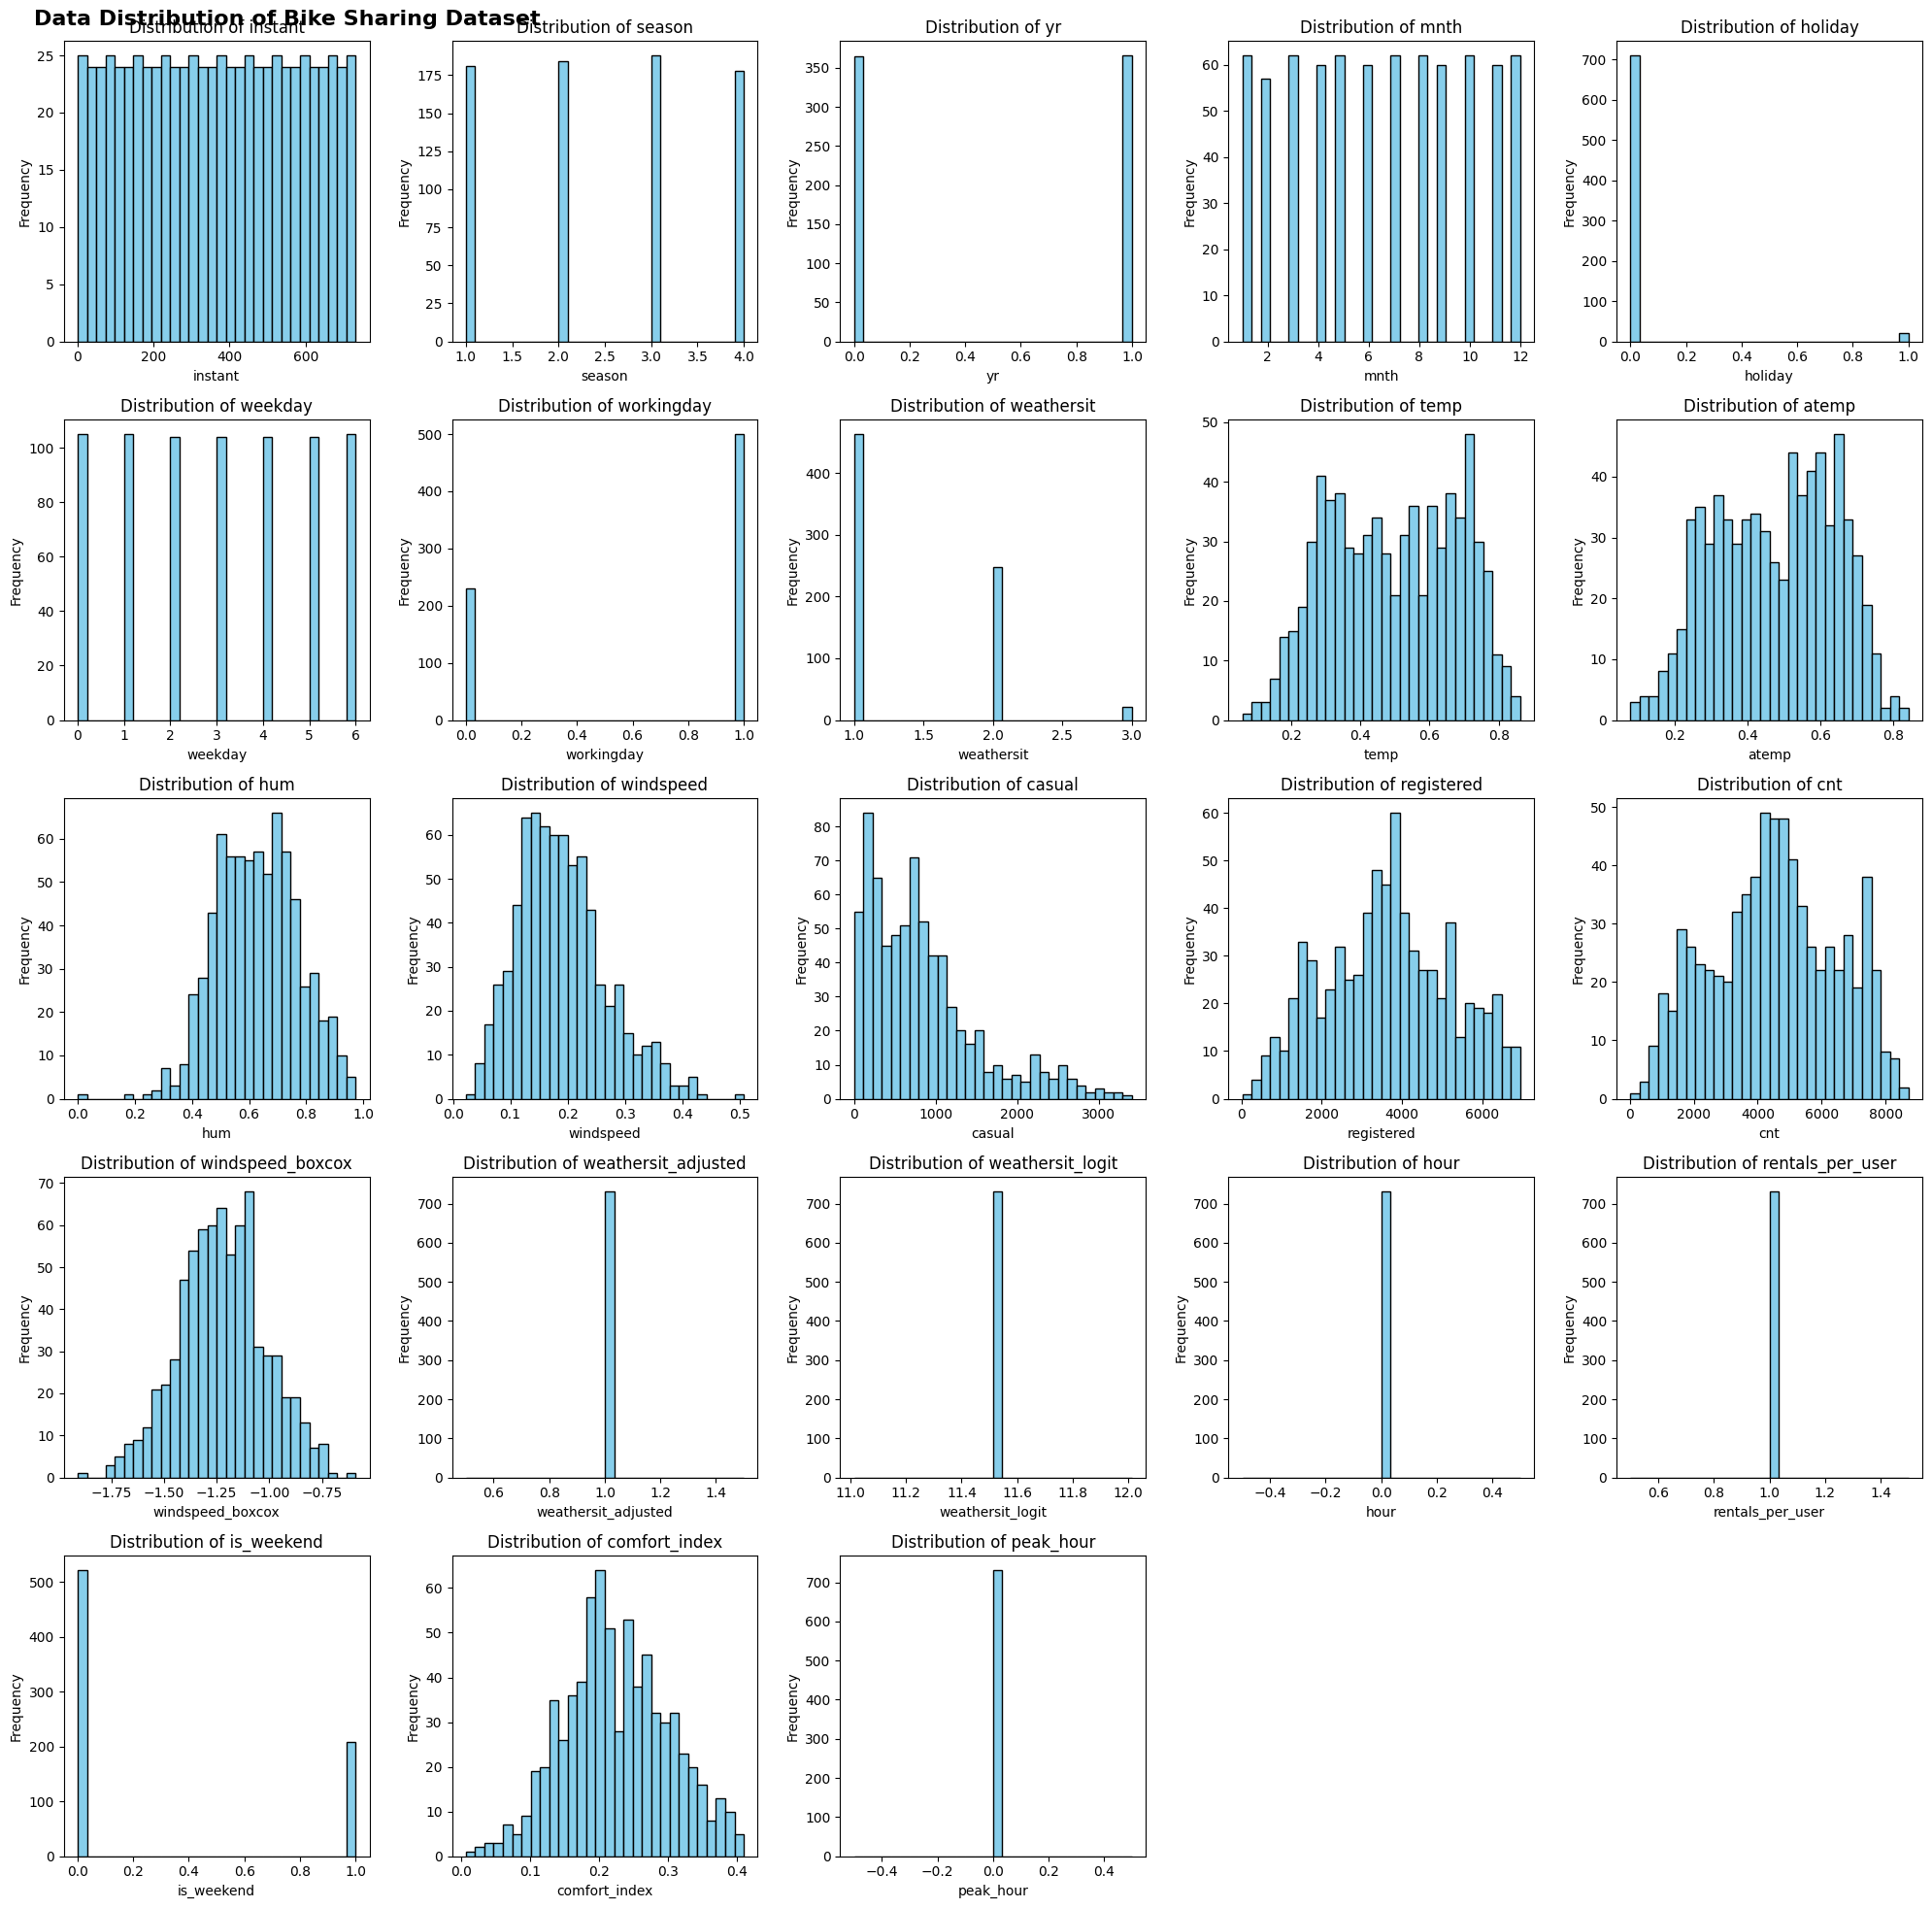

In [100]:
# Check distribution of numerical features
# Get numerical columns
num_columns = bike_share_data.select_dtypes(include=['number']).columns

# Define grid size (5 columns)
num_cols = 5
num_rows = (len(num_columns) // num_cols) + (len(num_columns) % num_cols > 0)

# Create a figure with a grid of subplots
plt.figure(figsize=(20, 4 * num_rows))  # Adjust height based on the number of rows
plt.suptitle("Data Distribution of Bike Sharing Dataset", fontsize=16, fontweight='bold', x=0.02, ha='left')  # Align to the left

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Position plot in a grid
    plt.hist(bike_share_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [101]:
# Skewness Computation with Interpretation
# Select only numerical columns
numerical_columns = bike_share_data.select_dtypes(include=['number'])

# Compute skewness
skew_values = numerical_columns.skew().sort_values(ascending=False)

# Create a DataFrame to store skewness values
skew_df = pd.DataFrame({'Skewness Value': skew_values})

# Apply interpretation directly
skew_df['Interpretation'] = ""

skew_df.loc[skew_df['Skewness Value'] == 0, 'Interpretation'] = "Norm Dist (γ₁ = 0)"
skew_df.loc[(skew_df['Skewness Value'] > -0.5) & (skew_df['Skewness Value'] < 0.5), 'Interpretation'] = "Min/No Skew (γ₁ = -0.5 to 0.5)"
skew_df.loc[skew_df['Skewness Value'] > 1, 'Interpretation'] = "Extreme Right-Skewed (γ₁ > 1)"
skew_df.loc[skew_df['Skewness Value'] < -1, 'Interpretation'] = "Extreme Left-Skewed (γ₁ < -1)"
skew_df.loc[(skew_df['Skewness Value'] >= 0.5) & (skew_df['Skewness Value'] <= 1), 'Interpretation'] = "Right-Skewed (γ₁ > 0.5)"
skew_df.loc[(skew_df['Skewness Value'] <= -0.5) & (skew_df['Skewness Value'] >= -1), 'Interpretation'] = "Left-Skewed (γ₁ < -0.5)"

# Display the skewness table
print(skew_df)

                     Skewness Value                  Interpretation
holiday                    5.654224   Extreme Right-Skewed (γ₁ > 1)
casual                     1.266454   Extreme Right-Skewed (γ₁ > 1)
weathersit                 0.957385         Right-Skewed (γ₁ > 0.5)
is_weekend                 0.949573         Right-Skewed (γ₁ > 0.5)
windspeed                  0.677345         Right-Skewed (γ₁ > 0.5)
comfort_index              0.067410  Min/No Skew (γ₁ = -0.5 to 0.5)
registered                 0.043659  Min/No Skew (γ₁ = -0.5 to 0.5)
weekday                    0.002742  Min/No Skew (γ₁ = -0.5 to 0.5)
rentals_per_user           0.000000  Min/No Skew (γ₁ = -0.5 to 0.5)
peak_hour                  0.000000  Min/No Skew (γ₁ = -0.5 to 0.5)
weathersit_adjusted        0.000000  Min/No Skew (γ₁ = -0.5 to 0.5)
instant                    0.000000  Min/No Skew (γ₁ = -0.5 to 0.5)
hour                       0.000000  Min/No Skew (γ₁ = -0.5 to 0.5)
weathersit_logit           0.000000  Min/No Skew

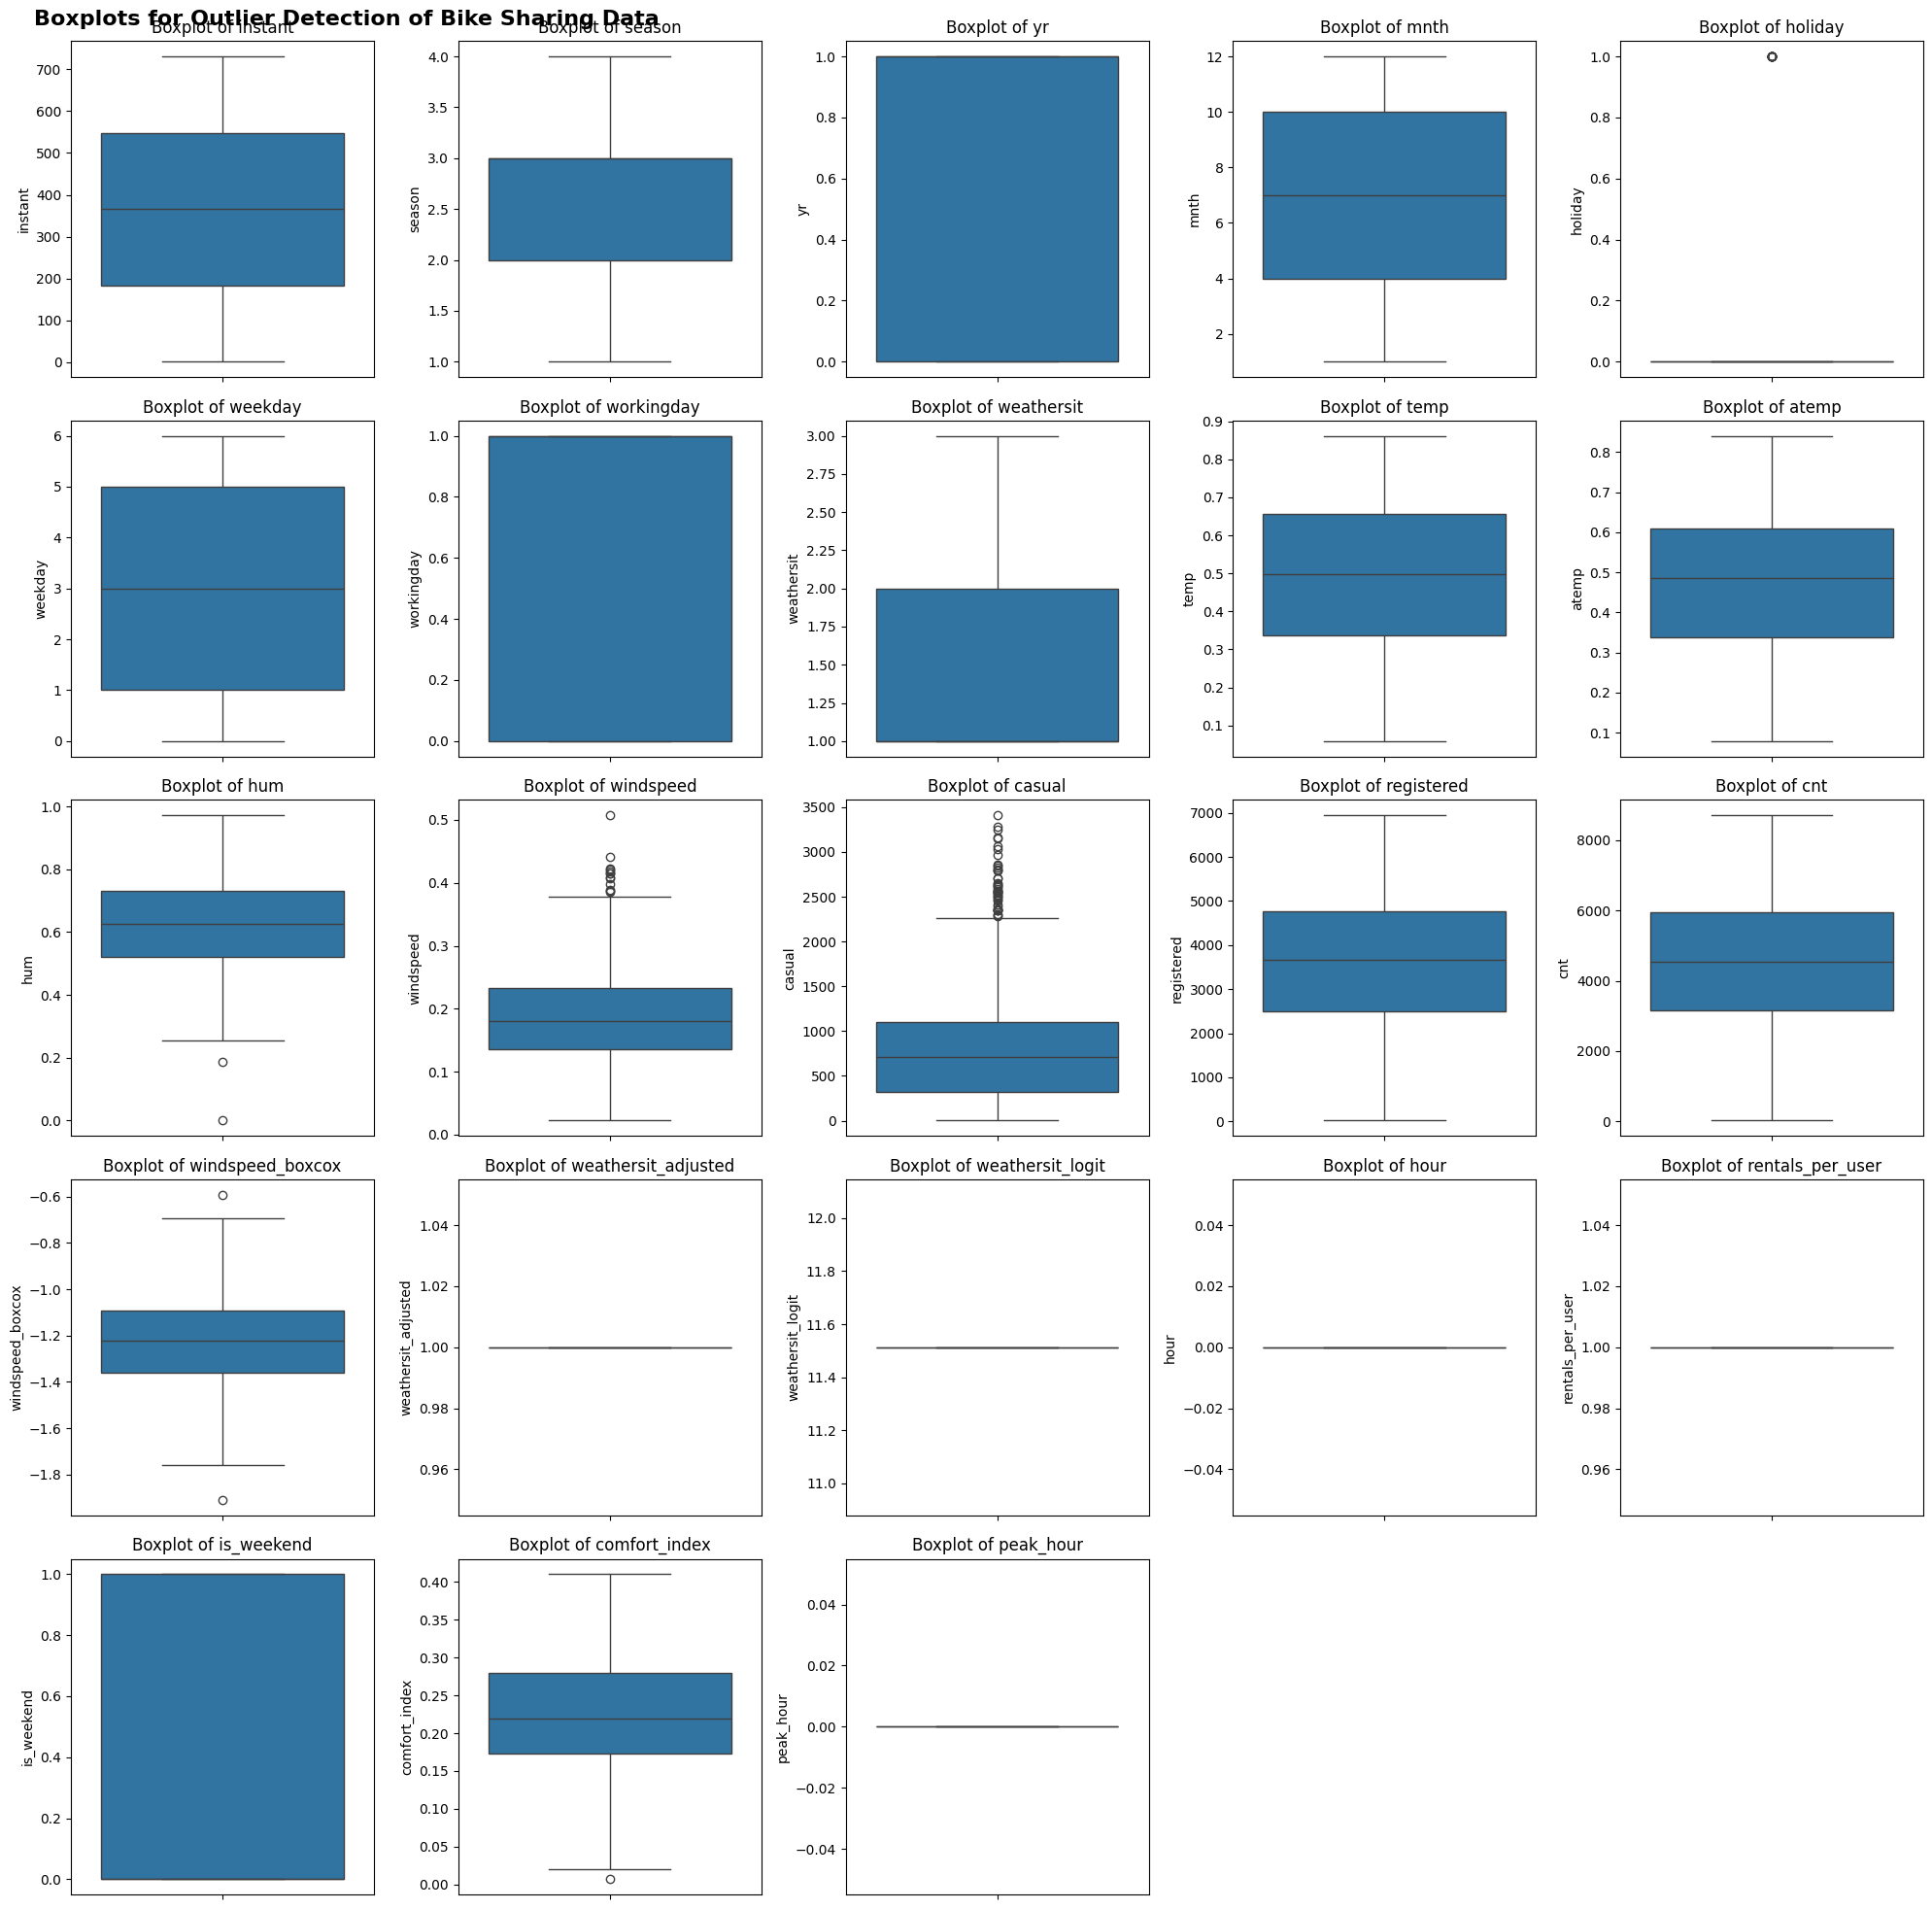

In [102]:
# Boxplots for outlier detection

# Get numerical columns
num_columns = bike_share_data.select_dtypes(include=['number']).columns

# Define grid size (5 columns)
num_cols = 5
num_rows = (len(num_columns) // num_cols) + (len(num_columns) % num_cols > 0)

# Create a figure with a grid of subplots
plt.figure(figsize=(20, 4 * num_rows))  # Adjust height based on the number of rows
# Add a header for the entire visualization
plt.suptitle("Boxplots for Outlier Detection of Bike Sharing Data", fontsize=16, fontweight='bold', x=0.02, ha='left')  # Align to the left

# Loop through numerical columns and create boxplots
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Position plot in a 4x5 grid
    sns.boxplot(y=bike_share_data[col])
    plt.title(f"Boxplot of {col}")
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Exporting Completed Dataset (for Power BI)

In [103]:
# Save the cleaned dataset to a CSV file
bike_share_data.to_csv('cleaned_bike_sharing_dataset.csv', index=False)
print("Cleaned data has been saved successfully!")

Cleaned data has been saved successfully!
